In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('water_potability.csv')
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
data. isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
ph_mean=data.ph.mean()
sl_mean=data.Sulfate.mean()
tr_mean=data.Trihalomethanes.mean()
data.ph=data.ph.fillna(ph_mean)
data.Sulfate=data.Sulfate.fillna(sl_mean)
data.Trihalomethanes=data.Trihalomethanes.fillna(tr_mean)
data.isnull().sum()
                                                


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [5]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## EDA


In [6]:
data


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


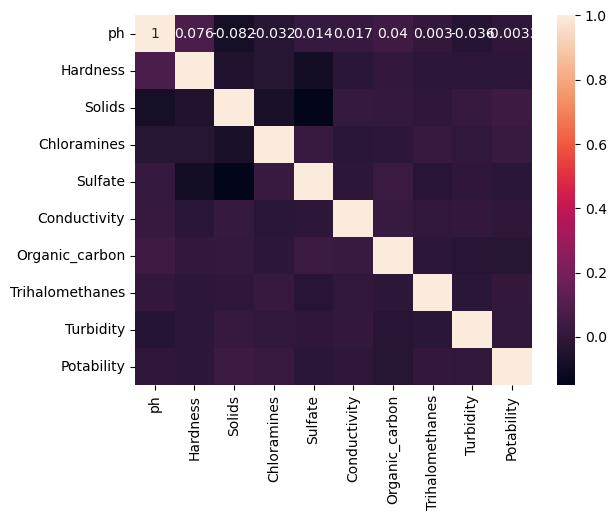

In [7]:
corre=data.corr()
sns.heatmap(corre,annot=True)
plt.show()

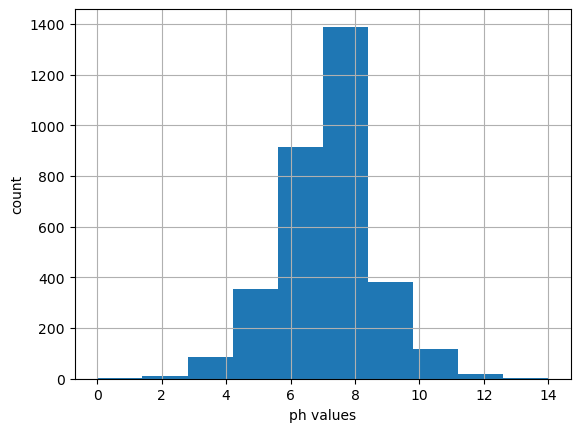

In [8]:
data['ph'].hist()
plt.xlabel('ph values')
plt.ylabel('count')
plt.show()

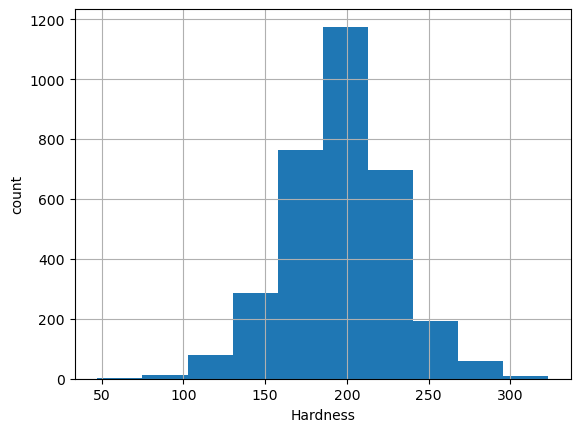

In [9]:
data['Hardness'].hist()
plt.xlabel('Hardness')
plt.ylabel('count')
plt.show()

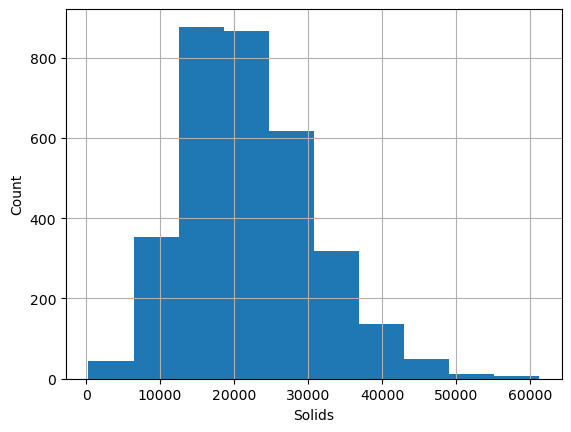

In [10]:
data['Solids'].hist()
plt.xlabel('Solids')
plt.ylabel('Count')
plt.show()

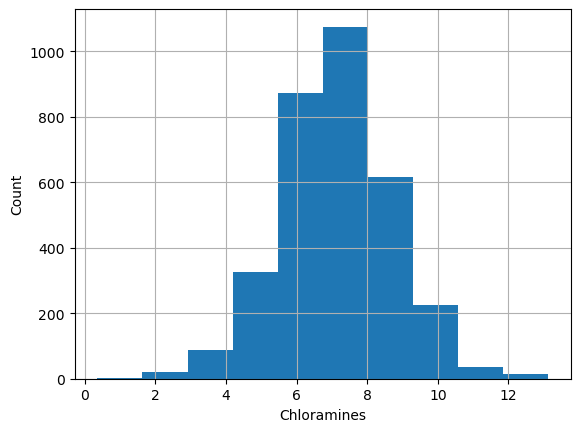

In [11]:
data['Chloramines'].hist()
plt.xlabel('Chloramines')
plt.ylabel('Count')
plt.show()

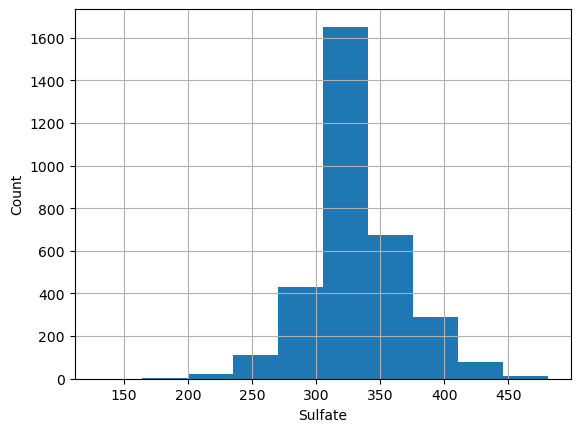

In [12]:
data['Sulfate'].hist()
plt.xlabel('Sulfate')
plt.ylabel('Count')
plt.show()

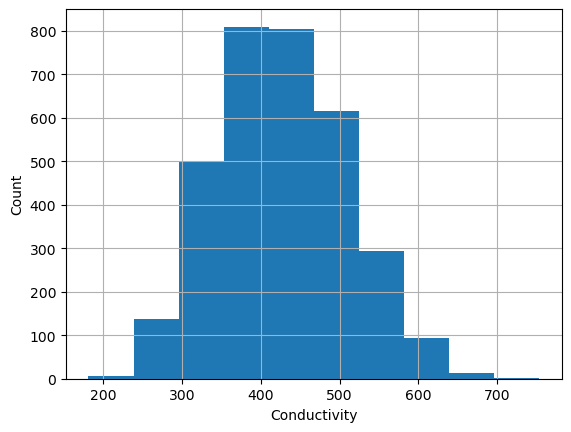

In [13]:
data['Conductivity'].hist()
plt.xlabel('Conductivity')
plt.ylabel('Count')
plt.show()

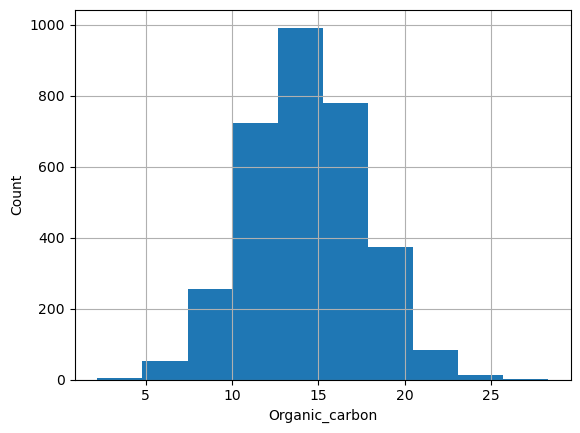

In [14]:
data['Organic_carbon'].hist()
plt.xlabel('Organic_carbon')
plt.ylabel('Count')
plt.show()


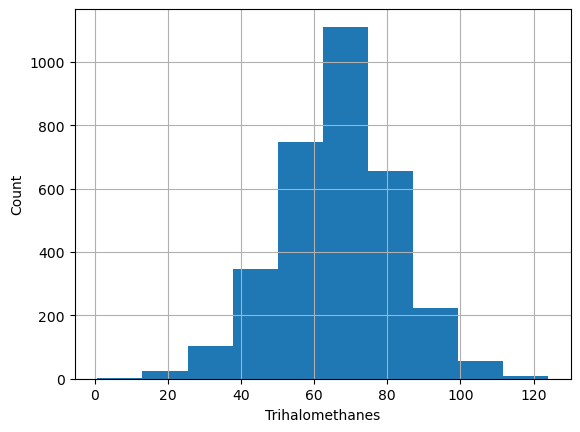

In [15]:
data['Trihalomethanes'].hist()
plt.xlabel('Trihalomethanes')
plt.ylabel('Count')
plt.show()

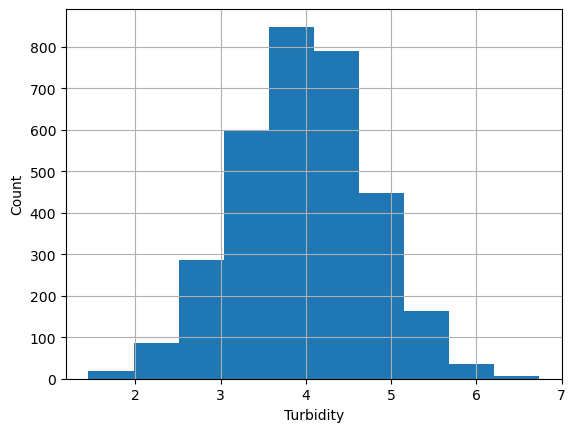

In [16]:

data['Turbidity'].hist()
plt.xlabel('Turbidity')
plt.ylabel('Count')
plt.show()

In [17]:
    data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [18]:
x=data.drop('Potability',axis=1)
y=data.Potability

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=35)

In [20]:
# scaler=StandardScaler()
# x_scaled=scaler.fit_transform(x)

#### crossvalidation

In [21]:
log_score=cross_val_score(LogisticRegression(),X=x,y=y,cv=5)
tree_score=cross_val_score(DecisionTreeClassifier(max_depth=5),X=x,y=y,cv=5)
kn_score=cross_val_score(KNeighborsClassifier(n_neighbors=250),X=x,y=y,cv=5)
for_score=cross_val_score(RandomForestClassifier(n_estimators=400,random_state=50),X=x,y=y,cv=5)
svc_score=cross_val_score(SVC(),X=x,y=y,cv=5)
guass_score=cross_val_score(GaussianNB(),X=x,y=y,cv=5)



In [22]:
print(np.mean(log_score))
print(np.mean(tree_score))
print(np.mean(kn_score))
print(np.mean(for_score))
print(np.mean(svc_score))
print(np.mean(guass_score))

0.6101954943213554
0.617833271271644
0.609890150809905
0.6376726866505307
0.609890150809905
0.6114173338298269


In [23]:
model=RandomForestClassifier(n_estimators=300,random_state=30)

In [24]:
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6813186813186813

In [25]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 30,
 'verbose': 0,
 'warm_start': False}

In [26]:
gscv=GridSearchCV(model,{'random_state':[30,40,50,60,70]})
gscv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=300,
                                              random_state=30),
             param_grid={'random_state': [30, 40, 50, 60, 70]})

In [27]:
gs_data=gscv.cv_results_
df=pd.DataFrame(gs_data)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.983849,0.060195,0.034443,0.006396,30,{'random_state': 30},0.684959,0.670732,0.714868,0.657841,0.649695,0.675619,0.022977,1
1,2.163656,0.194250,0.047715,0.010546,40,{'random_state': 40},0.670732,0.666667,0.706721,0.655804,0.631365,0.666258,0.024431,5
2,1.983251,0.061054,0.028358,0.004095,50,{'random_state': 50},0.674797,0.672764,0.700611,0.657841,0.647658,0.670734,0.017955,3
3,1.940255,0.050669,0.033309,0.004135,60,{'random_state': 60},0.672764,0.662602,0.698574,0.665988,0.645621,0.669110,0.017236,4
4,1.915321,0.043555,0.039788,0.006133,70,{'random_state': 70},0.680894,0.654472,0.700611,0.674134,0.649695,0.671961,0.018477,2


In [28]:
gscv.best_score_

0.6756188631132748

In [29]:
gscv.best_params_

{'random_state': 30}

In [30]:
y_pred=gscv.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [31]:
df1=pd.DataFrame({'true value':y_test,'predicted value':y_pred})
df1

,true value,predicted value
2173,0,0
3103,0,0
1705,0,0
514,0,0
368,1,1
...,...,...
1817,0,0
1904,1,0
916,0,0
1909,1,0


In [32]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[457,  60],
       [201, 101]], dtype=int64)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.88      0.78       517
           1       0.63      0.33      0.44       302

    accuracy                           0.68       819
   macro avg       0.66      0.61      0.61       819
weighted avg       0.67      0.68      0.65       819



### conclution

In [34]:
data.Potability.value_counts()


Potability
0    1998
1    1278
Name: count, dtype: int64

<Axes: ylabel='count'>

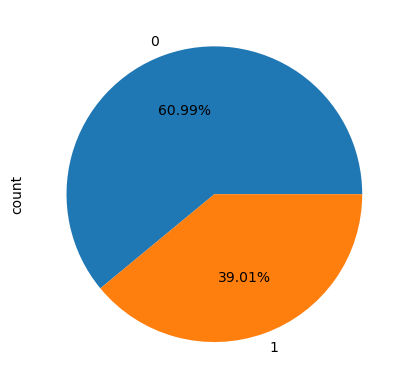

In [35]:
data['Potability'].value_counts().plot.pie(autopct='%.2f%%')